# Практическое задание: Stacking (Loan)

Студент: Горюнов Максим Юрьевич

Группа: 5030102/10201

### Tabular Playground Series

__Цель__ - предсказать убытки на основе различных факторов

__Должно быть выполнено:__
1) Исследовательский анализ данных (EDA).
2) Предварительная обработка данных.
3) Построение и оценка моделей Ridge, XGBoost и RandomForest.
4) Улучшение результатов с помощью стекинга указанных моделей.

## Решение

### Описание используемой модели

#### XGBoost

XGBoost (eXtreme Gradient BOOSTing) – это мощный ансамблевый (использующий набор более слабых предикторов для улучшения результата) метаалгоритм машинного обучения, который основан на методе градиентного бустинга и является его усовершенствованием. Он используется для решения задач классификации и регрессии и стал популярным благодаря своей высокой производительности и эффективности.

Основные характеристики XGBoost:

1. Высокая производительность: XGBoost часто показывает лучшие результаты на соревнованиях по машинному обучению. Это возможно благодаря применению метода градиентного бустинга: каждое новое строящееся дерево в первую очередь ориентируется на примеры, неверно обработанные на предыдущем этапе.

2. Регуляризация: Он штрафует сложные модели, используя как регуляризацию LASSO (L1), так и Ridge-регуляризацию (L2), для того, чтобы избежать переобучения.

3. Работа с разреженными данными: Алгоритм упрощает работу с разреженными данными, в процессе обучения заполняя пропущенные значения в зависимости от значения потерь. К тому же, он позволяет работать с различными узорами разреженности.

4. Параллельные вычисления: Он поддерживает параллельные вычисления, что ускоряет процесс обучения.

5. Расширяемость: Имеет возможность добавления пользовательских функций для расширения функционала (не используется в данном случае, однако является важной характеристикой в целом).


#### Ridge Regression

Ridge регрессия — метод линейной регрессии, который применяется для решения проблемы мультиколлинеарности для предотвращения переобучения модели. Она включает в себя добавление штрафа к функции потерь, что помогает улучшить обобщающую способность модели.

Формально Ridge регрессия минимизирует следующую функцию потерь:

\[ 
L = ∑(Y_i - (β_0 + ∑(β_j X_{ij}))^2) + λ ∑(β_j^2) 
\]

где \( Y_i \) — зависимая переменная, \( X_{ij} \) — независимые переменные, \( β_0 \) — свободный член, \( β_j \) — коэффициенты регрессии, и \( λ \) — параметр регуляризации. По сути штраф представляет собой норму в L2 (без взятия корня), умноженную на параметр λ. В отличие от LASSO, метод не зануляет коэффициенты, но делает их 
близкими к нулю.

Преимущества Ridge регрессии:

1. **Снижение переобучения**: За счет добавления штрафа к величине коэффициентов, Ridge регрессия помогает избежать переобучения, что особенно важно при наличии большого количества признаков.
2. **Устойчивость к мультиколлинеарности**: Метод эффективно справляется с проблемой, когда независимые переменные сильно коррелируют между собой, что может привести к нестабильным оценкам коэффициентов в обычной линейной регрессии.
3. **Улучшение предсказательной способности**: За счет регуляризации модель может демонстрировать лучшие результаты на тестовых данных по сравнению с обычной линейной регрессией.
4. **Гибкость**: Параметр \( λ \) позволяет настраивать уровень регуляризации, что позволяет учитывать различные (в том числе и внешние) ограничения, накладываемые на коэффициенты.

#### Random Forest

Random Forest (Случайный лес) — метод машинного обучения для классификации и регрессии (в данной задаче). Он основан на методе ансамблей, который комбинирует множество решений, чтобы повысить точность предсказаний. Основная идея заключается в создании множества деревьев решений и объединении их результатов.

Принцип работы Random Forest:

1. Случайная выборка данных: Для каждого дерева в лесу создается случайная подвыборка данных (техника "бэггинг" - Bagging).
2. Случайный выбор признаков: При построении каждого дерева из всех доступных признаков выбирается случайный подмножество. Это помогает уменьшить корреляцию между деревьями.
3. Объединение результатов: Для задачи регрессии используется среднее значение предсказаний всех деревьев.

Преимущества Random Forest:

1. Высокая точность: Random Forest часто показывает отличные результаты, особенно на больших и сложных наборах данных.
2. Устойчивость к переобучению: Благодаря ансамблю деревьев и случайности, метод менее подвержен переобучению по сравнению с отдельными деревьями решений.
3. Выявление важности признаков: Метод предоставляет информацию о важности каждого признака, что может помочь в интерпретации модели.
4. Отсутствие необходимости в масштабировании: Random Forest не требует предварительной нормализации или стандартизации данных.

Стекинг моделей - это ансамблевый метод, комбинирующий несколько алгоритмов для улучшения предсказательной способности. Он работает путем обучения мета-модели на выходах базовых моделей, которые также могут быть ансамблевыми (то есть, это не является ограничением на типы используемых моделей). В данном случае для стекинга используются Ridge регрессия, XGBoost и случайный лес (Random Forest).
Для того, чтобы получить итоговую мета-модель, сначала необходимо обучить исходные модели.

### Исследовательский анализ данных (EDA)

Импортируем используемые библиотеки:

In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from xgboost import XGBRegressor

Описание библиотек:
- xgboost - библиотека, содержащая реализованный алгоритм XGBoost.
- numpy - работа с массивами разной размерности. Типы из numpy также используются в pandas.
- pandas - библиотека для обработки и удобной работы с табличными данными, импортирования данных в разных форматах, включая CSV.
- matplotlib, seaborn - библиотеки визуализации данных.
- sklean.metrics - оценка результативности модели посредством различных метрик.
- sklearn.model_selection - разбиение выборки.
- sklearn.ensembe - ансамблевые методы.
- sklearn.preprocessing - скейлеры для предобработки данных.


Загрузим используемые данные,посмотрим, какие параметры содержатся в выборке и посчитаем отсутствующие значения:

In [172]:
all_data = pd.read_csv('data.csv')

In [173]:
print(all_data.info(show_counts=True))
print(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19981 entries, 0 to 19980
Columns: 102 entries, id to loss
dtypes: float64(100), int64(2)
memory usage: 15.5 MB
None
   id        f0   f1        f2        f3          f4        f5        f6  \
0   0 -0.002350   59  0.766739 -1.350460     42.2727  16.68570   30.3599   
1   1  0.784462  145 -0.463845 -0.530421  27324.9000   3.47545  160.4980   
2   2  0.317816   19 -0.432571 -0.382644   1383.2600  19.71290   31.1026   
3   3  0.210753   17 -0.616454  0.946362   -119.2530   4.08235  185.2570   
4   4  0.439671   20  0.968126 -0.092546     74.3020  12.30650   72.1860   

         f7         f8  ...        f91        f92      f93       f94  \
0  1.267300   0.392007  ...  -42.43990  26.854000  1.45751  0.696161   
1  0.828007   3.735860  ... -184.13200   7.901370  1.70644 -0.494699   
2 -0.515354  34.430800  ...    7.43721  37.218100  3.25339  0.337934   
3  1.383310 -47.521400  ...    9.66778   0.626942  1.49425  0.517513   
4 -0.233964  24.

Проверим данные на наличие отсутствующих значений при помощи `dropna`, который удаляет любую строку, содержащую отсутствующее значение:

In [174]:
all_data = all_data.dropna().drop('id', axis=1)
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19980 entries, 0 to 19979
Columns: 101 entries, f0 to loss
dtypes: float64(100), int64(1)
memory usage: 15.5 MB
None


Как видим, была всего одна строка, содержащая пустые значения, что свидетельствует о незначительной потере данных. Посмотрим на распределение целевой переменной:

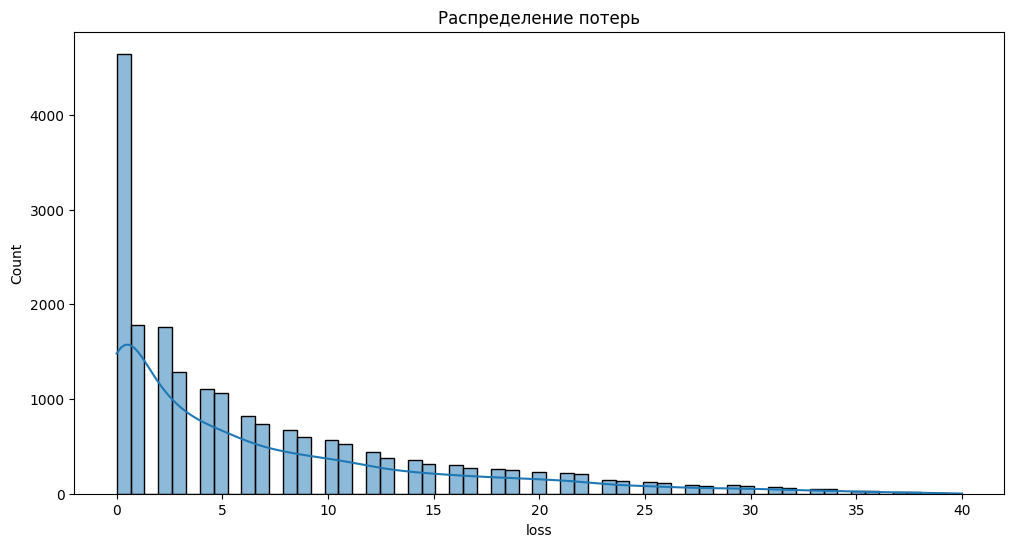

In [175]:
target_column = 'loss'
plt.figure(figsize=(12, 6))
sns.histplot(all_data[target_column], kde=True)
plt.title('Распределение потерь')
plt.show()

Проверим данные на выбросы и произведем замену выбросов на медианные значения:

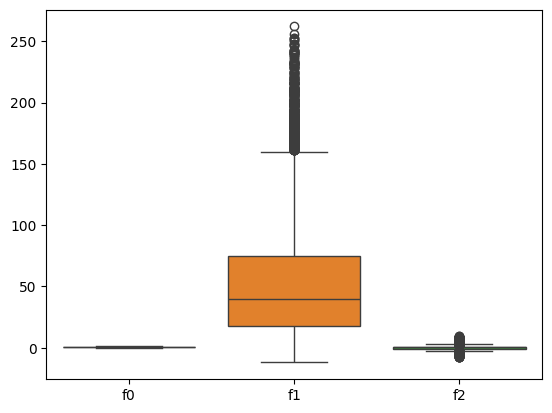

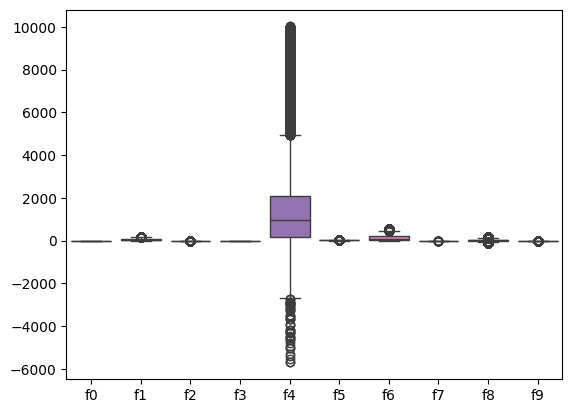

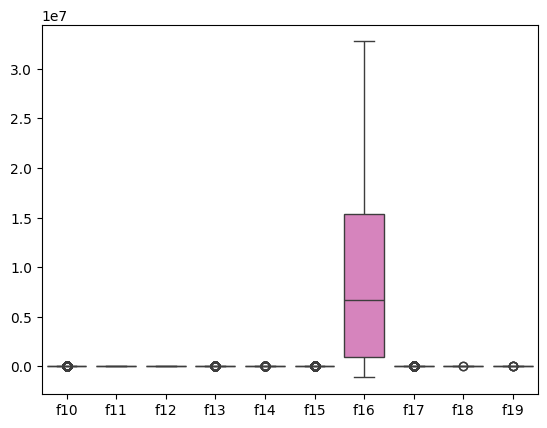

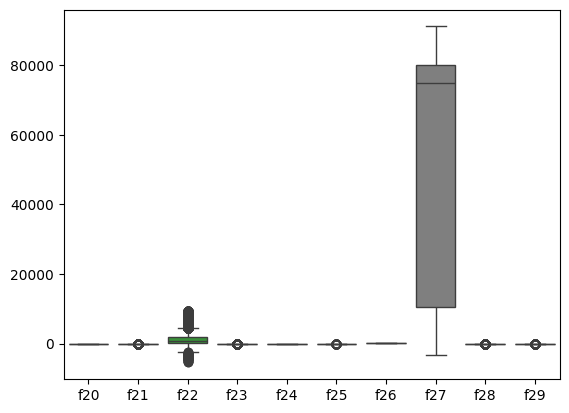

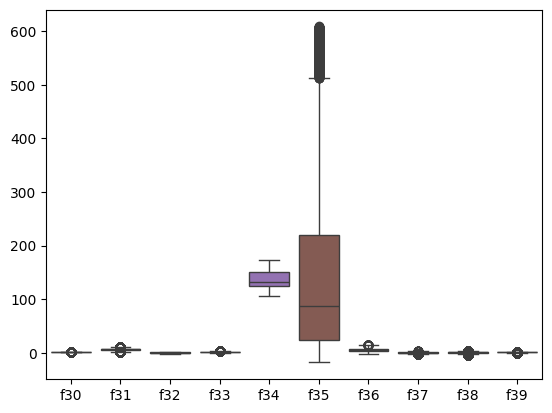

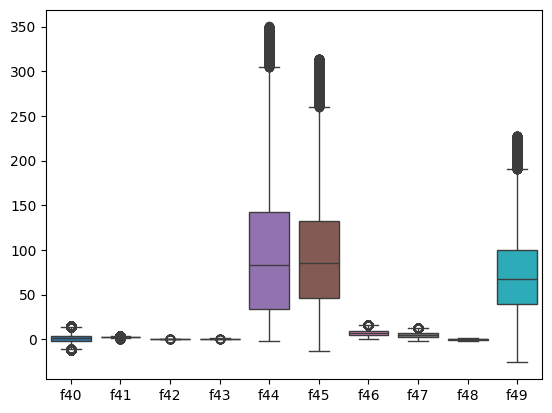

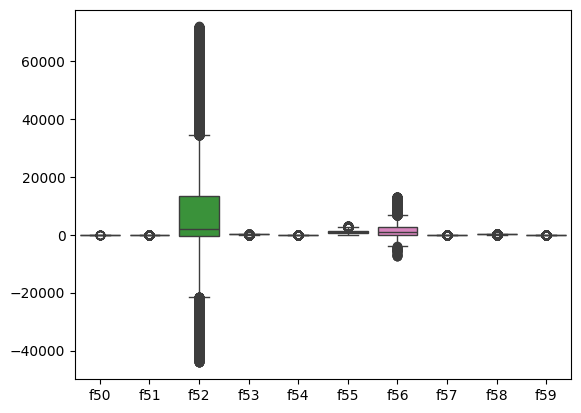

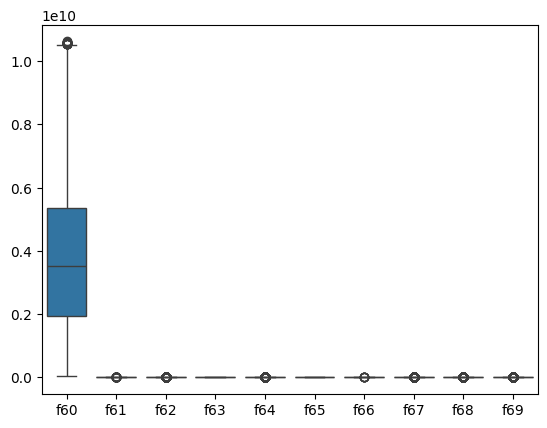

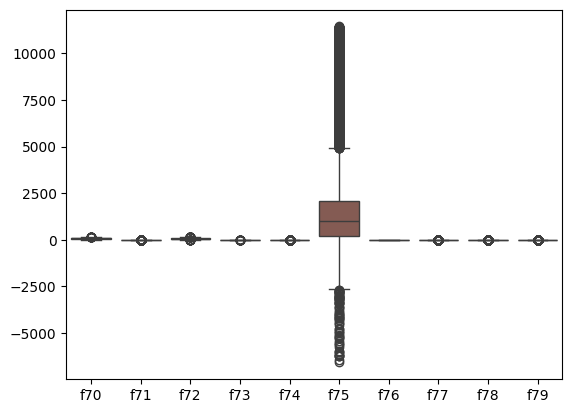

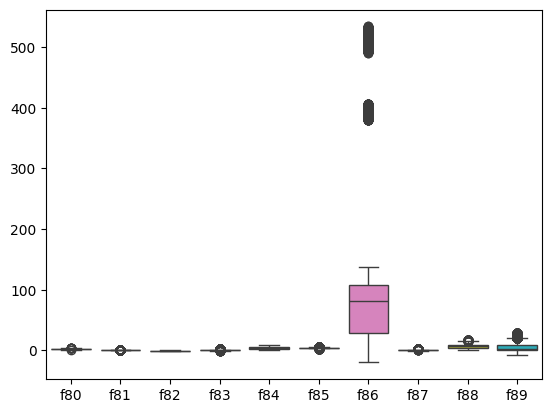

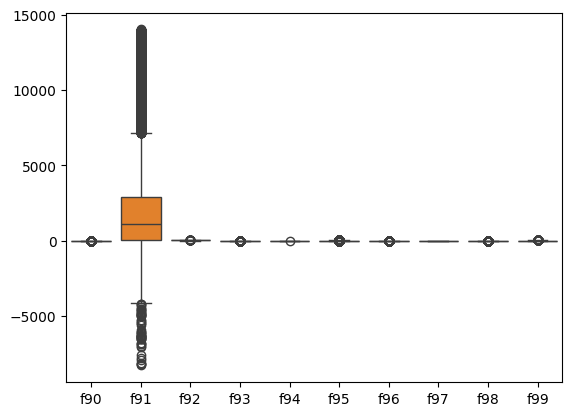

In [176]:
sns.boxplot(data=all_data[['f0', 'f1', 'f2']])
plt.show()

Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

all_data = all_data.mask((all_data < lower_bound) | (all_data > upper_bound), all_data.median(), axis=1)

for i in range(0, 10):
    sns.boxplot(data=all_data[[f'f{i * 10 + j}' for j in range(0, 10)]])
    plt.show()

Таким образом, обработали выбросы. Конечно, часть выбросов останется, так как с учетом пересчета старых значений на медиану те, которые "подходили к краю" до них, теперь будут выходить за усы.

Построим корреляционную матрицу:

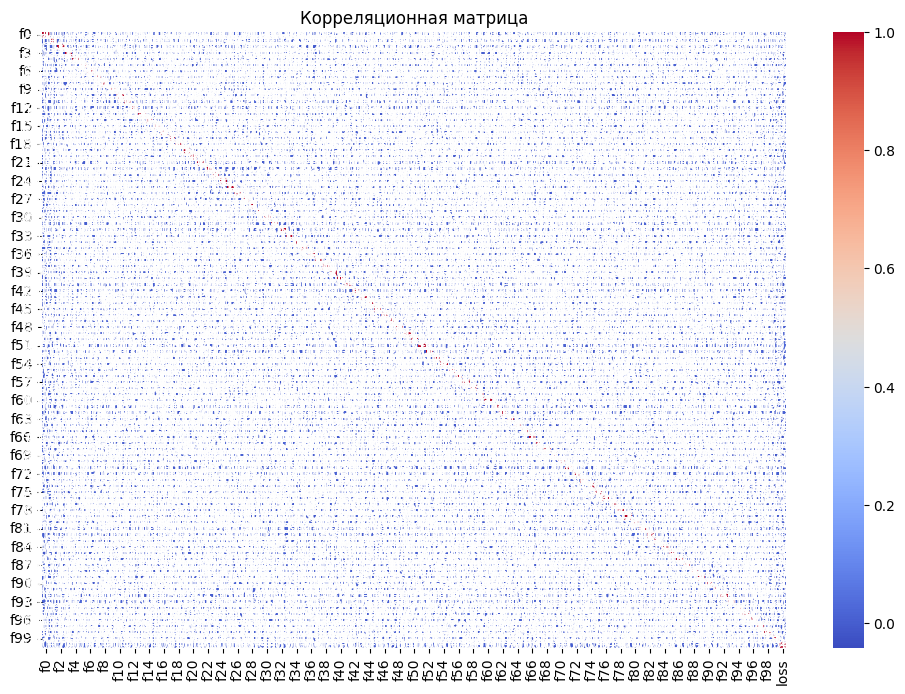

In [162]:
plt.figure(figsize=(12, 8))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Несмотря на то, что корреляционная матрица нечитаема, посмотрев на данные, можно сделать вывод, что они - численные. Это означает, что отсутствует необходимость в кодировании категориальных признаков (как, например, пришлось делать в работе по предсказанию автостраховки).

Тем не менее, в матрице большое количество пустых мест. Попробуем произвести процесс отбора признаков через анализ корреляции каждого признака с целевой переменной. Выберем N признаков, наиболее коррелирующих с ней (вообще говоря, все признаки коррелируют слабо. Тем не менее, у некоторых признаков разница - на порядки, поэтому выберем наиболее коррелирующие):

In [240]:
correlation = all_data.corr()['loss']
n = 15 + 1  # количество наиболее коррелирующих переменных + 1
cor_vals = correlation.abs().sort_values(ascending=False)
top_n_correlations = cor_vals.head(n)
# bottom_n_correlations = cor_vals.tail(n - 1)
print(top_n_correlations)
correlated_keys = top_n_correlations.keys().tolist()
corr_data = all_data[correlated_keys]
print(corr_data.info())

loss    1.000000
f96     0.031966
f6      0.026154
f13     0.025387
f46     0.024225
f43     0.023979
f78     0.023550
f58     0.023079
f63     0.021282
f26     0.019460
f1      0.019421
f74     0.019092
f39     0.018745
f66     0.018510
f25     0.017447
f5      0.016133
Name: loss, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 19980 entries, 0 to 19979
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loss    19980 non-null  float64
 1   f96     19980 non-null  float64
 2   f6      19980 non-null  float64
 3   f13     19980 non-null  float64
 4   f46     19980 non-null  float64
 5   f43     19980 non-null  float64
 6   f78     19980 non-null  float64
 7   f58     19980 non-null  float64
 8   f63     19980 non-null  float64
 9   f26     19980 non-null  float64
 10  f1      19980 non-null  int64  
 11  f74     19980 non-null  float64
 12  f39     19980 non-null  float64
 13  f66     19980 non-null  float64
 14  

Подготовим данные для построений модели и разобьем выборку на обучающую и тестовую:

In [241]:
prep_data = all_data # So that all_data is not overwritten
prep_data = corr_data
X = prep_data.drop(target_column, axis=1)
y = prep_data[target_column]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Модель XGBoost

Создадим и обучим модель на обучающей выборке:

In [261]:
xgboost_model = XGBRegressor()

In [262]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Далее получим предсказания модели на тестовой выборке:

In [263]:
y_pred = xgboost_model.predict(X_test)

Полученные результаты можно оценить при помощи таких метрик, как `MSE` (Mean Squared Error) и `R^2`:

**Дополнение**: до выбора наиболее значащих переменных MSE был выше. Тем не менее, R^2 остается меньше нуля и после выбора.

In [265]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.2956495078181
R^2 Score: -0.1303553151554251


Видим, что MSE достаточно мало, а R^2 близко к нулю. Тем не менее, необходимо сравнить результаты с другими моделями и с их комбинацией.

### Ridge регрессия

Создадим модель `Ridge` регрессии:

In [250]:
X = prep_data.drop(target_column, axis=1)
# print(X.info())
y = prep_data[target_column]

X = scaler.fit_transform(X)
ridge_model = Ridge(alpha=1.0)

Обучим созданную модель:

In [251]:
ridge_model.fit(X_train, y_train)

Ridge()

Посчитаем метрики `MSE` и `R^2` для данной модели:

In [252]:
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

score = ridge_model.score(X_test, y_test)
print(f'R^2 Score: {score}')

MSE: 34.58411662887584
R^2 Score: 0.005173841352914099


MSE и R^2 лучше, чем у модели XGBoost. Рассмотрим 3-ю модель.

### Random Forest

Подготовим данные:

In [ ]:
prep_data = corr_data
# print(prep_data.info())
X = prep_data.drop('loss', axis=1) 
y = prep_data['loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 19980 entries, 0 to 19979
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loss    19980 non-null  float64
 1   f96     19980 non-null  float64
 2   f6      19980 non-null  float64
 3   f13     19980 non-null  float64
 4   f46     19980 non-null  float64
 5   f43     19980 non-null  float64
 6   f78     19980 non-null  float64
 7   f58     19980 non-null  float64
 8   f63     19980 non-null  float64
 9   f26     19980 non-null  float64
 10  f1      19980 non-null  int64  
 11  f74     19980 non-null  float64
 12  f39     19980 non-null  float64
 13  f66     19980 non-null  float64
 14  f25     19980 non-null  float64
 15  f5      19980 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 2.6 MB
None


Создадим и обучим модель:

In [257]:
random_forest = RandomForestRegressor(random_state=42)

In [258]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Получим оценки для метода случайного леса:

In [259]:
y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 35.898309309309305
R^2 Score: -0.03262944476329488


Полученные оценки превосходят метод XGBoost, но уступают методу гребневой регрессии. Также стоит отметить, что время обучения данной модели значительно превосходит время обучения Ridge регрессии и алгоритма градиентного бустинга.

### Stacking

Теперь, когда все три модели обучены, можно перейти к стакингу. Для этого в библиотеке `sklearn` уже реализована данная процедура как один из ансамблевых методов. В качестве объединяющего эстиматора (параметр `final_estimator`) была выбрана Ridge регрессия как показавшая наилучшие результаты из трех моделей.

In [269]:
prep_data = corr_data
# print(prep_data.info())
X = prep_data.drop('loss', axis=1) 
y = prep_data['loss']

In [273]:
ridge_s = Ridge()
xgboost_s = XGBRegressor()
random_forest_s = RandomForestRegressor()

stacking_model = StackingRegressor(
    estimators=[
        ('ridge', ridge_s),
        ('xgboost', xgboost_s),
        ('random_forest', random_forest_s)
    ],
    final_estimator=Ridge()
)

In [274]:
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge', Ridge()),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constr...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('random_forest', RandomForestRegressor())],
                  final_estimator=Ridge())

Оценки для метода стэкинга:

In [275]:
y_pred = stacking_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 34.58844714697629
R^2 Score: 0.005049272241230418


Полученные оценки `MSE` и `R^2` близки к тем, что демонстрирует гребневая регрессия. То есть, результаты `XGBoost` и `Random Forest` не "утянули" результаты стэкинговой модели вниз, что показательно характеризует ее свойства.

### Выводы

В рамках данной работы были реализованы модели XGBoost, Ridge регрессии и случайного леса, для каждой из моделей получены оценки предсказательной способности `MSE` и `R^2`. Затем три обученные модели были сравнены с методом стэкинга, опирающегося на них же. В результате работы были произведены следующие выводы и выявлены проблемы:
- Модели XGBoost и Ridge сравнимы по скорости обучения, Random Forest обучается значительно дольше (секунды против минут, разница - в порядок минимум).
- При этом модель Ridge (на данной конкретной выборке, не является общим правилом) демонстрирует лучшие результаты из всех трех моделей.
- Модель Stacking обучается дольше каждой из трех используемых моделей, однако имеет оценки работоспособности близкие к лучшей из них.
- Возможно, Stacking модель проявит себя лучше на новых данных, полученных при тех же испытаниях, чем каждая из индивидуальных моделей, за счет учета всех результатов.
- При этом нельзя сказать, что модели обучились хорошо: несмотря на малый MSE, параметр R^2 близок к нулю у всех моделей.
- Для предотвращения данного поведения были проведены процедуры замены выбросов на медианы (так как гарантировать, что выборки по разным параметрам совместные, мы не можем: в случае удаления строки с выбросом может возникнуть ситуация, в которой из исходного датасета не останется значений) и корреляционный анализ с выбором наиболее значащих переменных.
- Стоит отметить, что несмотря на то, что разница в корреляции с итоговой переменной loss между независимыми переменными f0..f99 может отличаться на порядки, ни одна из переменных не коррелирует с loss более, чем на 0.04, что в прочих задачах может демонстрировать крайне слабую корреляцию (так, в задаче на бустинг посредством XGBoost наиболее скоррелированные переменные имели корреляцию с целевой порядка 0.35). Тем не менее, это можно объяснить большим количеством переменных. Также значительное количество переменных (100) не позволяет провести визуальную оценку корреляционной матрицы, ввиду чего приходится производить выбор, опираясь на фактические корреляционные величины.